# Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Importing the dataset 

In [2]:
from sklearn.datasets import load_iris

data = load_iris()

# Looking at the Dataset information

In [3]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Selecting only the features from the data

In [4]:
iris = data.data

# Selecting the value of k (number of clusters) by Elbow method

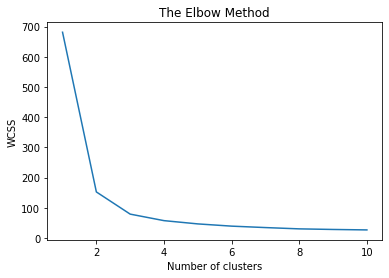

In [ ]:
# Using the elbow method to find  the optimal number of clusters
wcss = [] #within cluster sum of squares - sum of sqaures of distance of all points from their cluster centroids.
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(iris)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying k means with selected value of k

In [ ]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_iris = kmeans.fit_predict(iris)
y_iris

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

# Visualizing the clusters

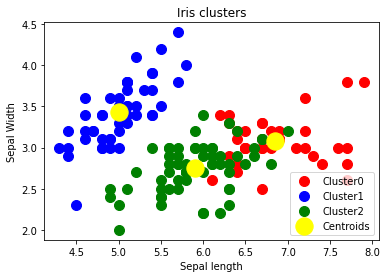

In [ ]:
#Converting dataframe into array for boolean subsetting purpose for plotting
iris = pd.DataFrame(iris).to_numpy()

# Visualising the clusters
plt.scatter(iris[y_iris == 0, 0], iris[y_iris == 0,1],s=100,c='red',label='Cluster0')
plt.scatter(iris[y_iris == 1, 0], iris[y_iris == 1,1],s=100,c='blue',label='Cluster1')
plt.scatter(iris[y_iris == 2, 0], iris[y_iris == 2,1],s=100,c='green',label='Cluster2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Iris clusters')
plt.xlabel("Sepal length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

#Evaluation 

## Adjusted Rand Index

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(data.target, y_iris)

0.7302382722834697

## Mutual Information based Score

In [ ]:
#Mutual Information based score

#Normalised mutual information

from sklearn.metrics.cluster import normalized_mutual_info_score

print("Normalized mutual information score is")
print(normalized_mutual_info_score (data.target, y_iris))

#Adjusted mutual information

from sklearn.metrics.cluster import adjusted_mutual_info_score

print("Adjusted mutual information score is")
print(adjusted_mutual_info_score (data.target, y_iris))

Normalized mutual information score is
0.7581756800057784
Adjusted mutual information score is
0.7551191675800484


## Silhouette Coefficient

In [ ]:
#Silhouette Coefficient

from sklearn.metrics.cluster import silhouette_score

silhouette_score(iris, y_iris, metric = 'euclidean')

0.5528190123564091